# Setup Test Population

In [1]:

from src.controller.ga import GeneticAlgorithm, GAConfig
from src.model.molecule import Molecule
from src.model.population import Population
from src.model.fitness import compute_fitness, compute_fitness_penalized, novelty_augmented_fitness


soup = ['[C][#N]', '[C][=O]', '[C][O]', '[C][C][O]', '[C][C][=O]', '[O][=C][C][O]', '[O][=C][O]', '[N][C][=Branch1][C][=O][N]', '[N]', '[O]', '[N][C][C][=Branch1][C][=O][O]', '[C][C][Branch1][=Branch1][C][=Branch1][C][=O][O][N]', '[C][C][=Branch1][C][=O][O]', '[C][C][N]', '[C][S]', '[C][C][=Branch1][C][=O][C][=Branch1][C][=O][O]', '[C][C][=Branch1][C][=O][C]', '[O][=C][=O]', '[O][=C][=S]', '[O][P][=Branch1][C][=O][Branch1][C][O][O]', '[C][=C][C][=C][C][=C][Ring1][=Branch1]', '[C][=C][N][=C][NH1][Ring1][Branch1]', '[C][C][=C][NH1][C][=Ring1][Branch1]', '[C][C][C][C][C][Ring1][Branch1]', '[C][C][C][C][C][C][Ring1][=Branch1]']

initial = []
for s in soup:
    initial.append(Molecule(s))

pop = Population(initial)

# Configure GA

In [2]:
cfg = GAConfig(
    mu=25,
    lam=25,
    mutation_rate=0.5,
    crossover_rate=0.5,
    tournament_k=2,
    random_seed=0
)

ga = GeneticAlgorithm(cfg, lambda m: compute_fitness_penalized(m, 0.1, 0.2, 0.3))

# Evolution and History

In [3]:
history = ga.evolve(pop, generations=10)
print("Evolution done!")

Generation  0
[<src.model.molecule.Molecule object at 0x0000017398842BD0>, <src.model.molecule.Molecule object at 0x00000173988607A0>]
[<src.model.molecule.Molecule object at 0x0000017398842E10>, <src.model.molecule.Molecule object at 0x000001739839F9B0>]
[<src.model.molecule.Molecule object at 0x0000017398842810>, <src.model.molecule.Molecule object at 0x00000173988435C0>]
[<src.model.molecule.Molecule object at 0x0000017398841DF0>, <src.model.molecule.Molecule object at 0x0000017398843320>]
[<src.model.molecule.Molecule object at 0x0000017398842450>, <src.model.molecule.Molecule object at 0x0000017398843650>]
[<src.model.molecule.Molecule object at 0x0000017398843F80>, <src.model.molecule.Molecule object at 0x000001739882B4A0>]
[<src.model.molecule.Molecule object at 0x0000017398842690>, <src.model.molecule.Molecule object at 0x0000017398843290>]
[<src.model.molecule.Molecule object at 0x0000017398843650>, <src.model.molecule.Molecule object at 0x0000017398739C40>]
[<src.model.molecu

# Visualize

In [4]:
for gen, p in enumerate(history):
    print(f"\nGeneration {gen}")
    for n in p.molecules:
        print(n.smiles)



Generation 0
CC(=O)C(=O)O
CC(C(=O)O)N
NCC(=O)O
NCC(=O)O
O=C=CN=C[NH1]
CCC(=O)OOO
O=CCO
N
O=CC=O
O=C=O
CC(=O)O
CC(=O)O
CC(=O)O
CC(=O)O
O=CO
O
C1=CN=C[NH1]1
C1=CN=C[NH1]1
CCOCO
CCCN
CCN
CCN
C#N
CO
CCO

Generation 1
CC(C(C)O)O
CC(=O)C(=O)O
CC(C(=O)O)N
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCCO
O=C=CN=C[NH1]
O=C=CN=C[NH1]
CCC(=O)OOO
CCC(=O)OOO
O=CCO
O=CCO
CC(=O)N=C[NH1]
OCNCC(=O)O
N
O=CC=O
O=C=O
CC(=O)C(C)C=O
CC(=O)O
CC(=O)O
CC(=O)O
CC(=O)O
CC(=O)O

Generation 2
CC(=N)C=O
CC(C(C)O)O
CC(=O)C(=O)O
CC(=O)C(=O)O
O=CC=NO
CC(C(=O)O)N
NCC(C)C(C)OO
NCC=O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCCO
O=C=CN=C[NH1]
CCC(O)OO
O=C=CN=C[NH1]
O=C=CN=C[NH1]
CCC(=O)OOO
CCC(=O)OOO
CCC(=O)OOO
O=CCO

Generation 3
CC(=N)C=O
CC(=N)C=O
CC(=N)COO
C(=N)C=O
CC(C(C)O)O
CC(=O)C(=O)O
CC(=O)C(=O)O
O=CC=NO
CC(C(=O)O)N
NCC(C)C(C)OO
CC(=O)C(=O)C=O
CNCC(=O)O
NCC=O
NCC(C)CC(C)OO
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O
NCC(=O)O

Generation 4
CC(=

Generation 0


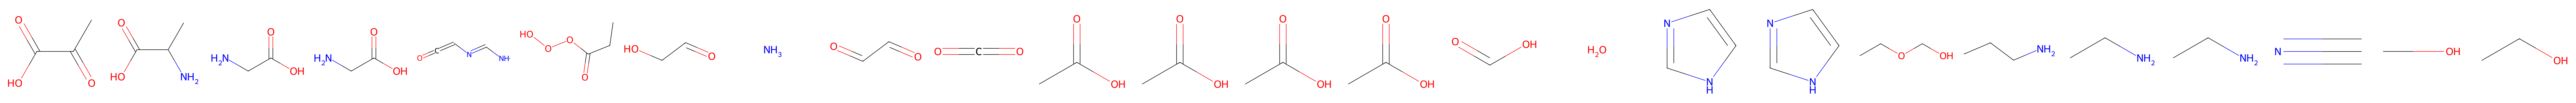

Generation 1


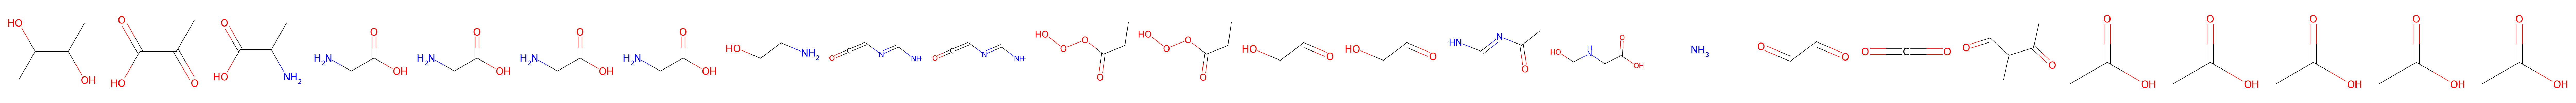

Generation 2


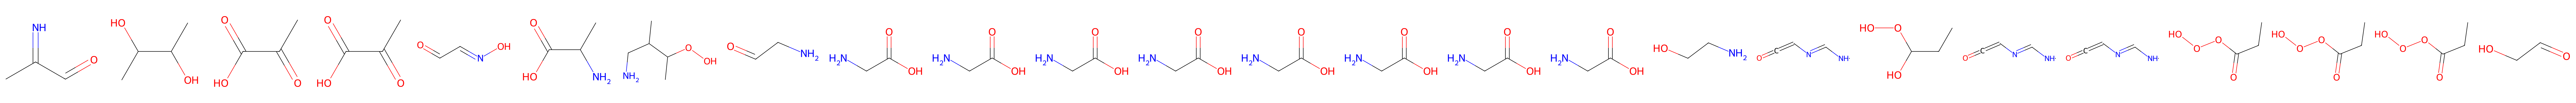

Generation 3


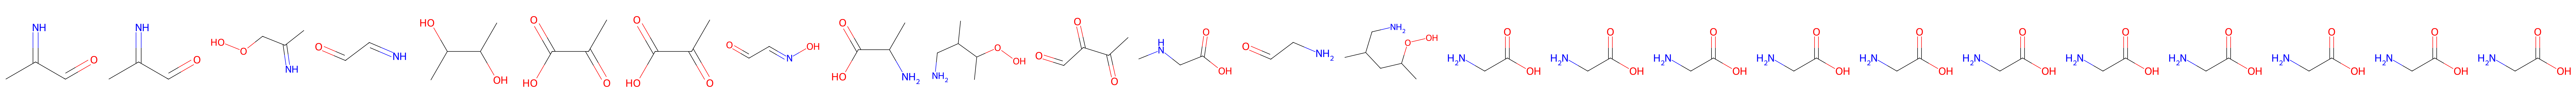

Generation 4


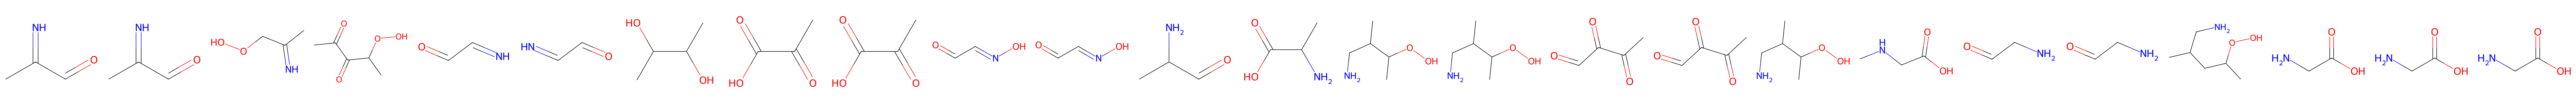

Generation 5


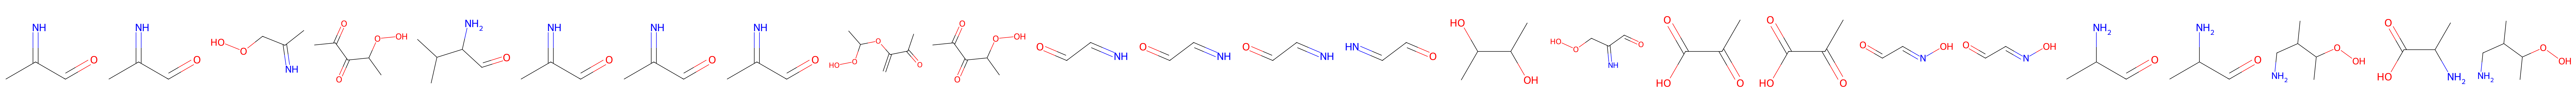

Generation 6


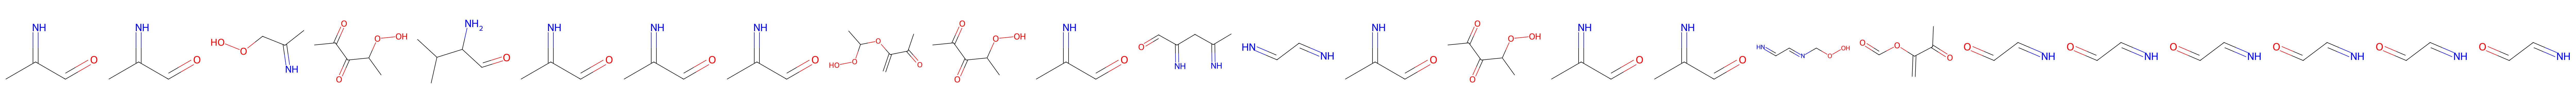

Generation 7


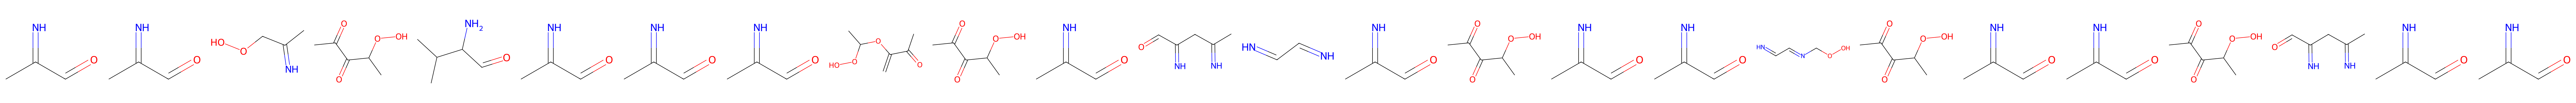

Generation 8


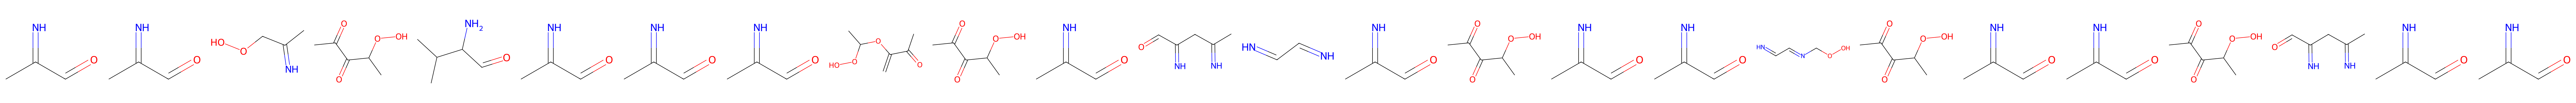

Generation 9


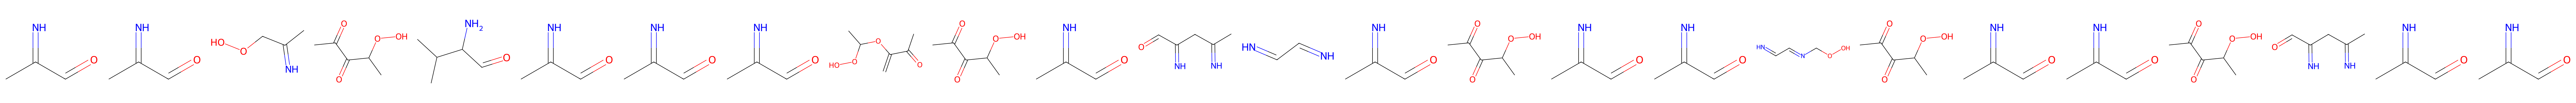

In [5]:
from src.view.viewer import population_grid
from IPython.display import display

for gen, p in enumerate(history):
    print(f"Generation {gen}")
    display(population_grid(p, n=25, subimg_size=(400, 400)))

# Plot Mean Fitness Over Time

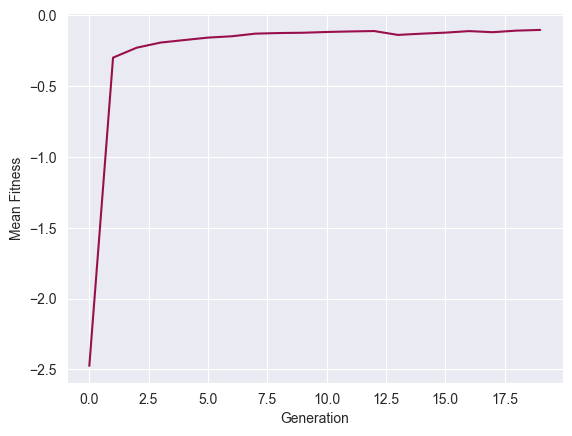

In [9]:
from src.view.plots import plot_fitness_over_time
plot_fitness_over_time(history)

# GIF?

In [24]:
import imageio
from rdkit.Chem.Draw import MolToImage
imgs = []

for p in history:
    best = min(p.molecules, key=lambda m: p.fitness[m])
    img = MolToImage(best.rdkit_mol, size=(300, 300))
    imgs.append(img)

imageio.mimsave("best_molecules.gif", imgs, duration=5)

In [25]:
for p in history:
    best = min(p.molecules, key=lambda m: p.fitness[m])
    print(best.smiles)

CC(=O)C(=O)O
CC(=O)C(=O)O
CC(=O)C(=O)O
CC(C=CO)ON
CC(C=CO)ON
[C-1]C(C=CO)ON
[C-1]C(C=CO)ON
CC(C=CC)C(C=CO)ON
CC(C=CC)C(C=CO)ON
CC(C=CC)C(C=CO)ON
